In [1]:
import pandas as pd

file_path = r"C:\Users\naikp\Downloads\Vikash.csv"
data = pd.read_csv(file_path)

#print(data.head())

In [1]:
print('Hi')

Hi


In [2]:
# Get the count of unique session IDs
unique_sessions = data['Session ID'].nunique()

# Filter numeric values in the 'Total Shots' column and sum them
total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

print("Total sessions played:", unique_sessions)
print("Total shots:", total_shots)

Total sessions played: 3
Total shots: 13.0


In [3]:
import numpy as np

# Group by 'Session ID' and get the first row of each session
first_rows = data.groupby('Session ID').first().reset_index()

# Filter out rows with zero values in 'Bat Speed - Hits' or 'Impact Speed'
filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]

# Calculate Timing Index for each session as (Impact Speed / Bat Speed - Hits) * 100
filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

# Calculate the averages for each column
avg_bat_speed_hits = np.round(filtered_rows['Bat Speed - Hits'].mean())
avg_impact_speed = np.round(filtered_rows['Impact Speed'].mean())
avg_sweetspot = np.round(filtered_rows['Sweetspot %'].mean())
avg_timing_index = np.round(filtered_rows['Timing Index'].mean())

print("Average Bat Speed - Hits:", avg_bat_speed_hits)
print("Average Impact Speed:", avg_impact_speed)
print("Average Sweetspot %:", avg_sweetspot)
print("Average Timing Index:", avg_timing_index)


Average Bat Speed - Hits: 69.0
Average Impact Speed: 59.0
Average Sweetspot %: 42.0
Average Timing Index: 86.0


C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\3750686512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


In [4]:
# Replace NaN values with 0 in the relevant columns
data[['Backfoot', 'On The Crease', 'Frontfoot']] = data[['Backfoot', 'On The Crease', 'Frontfoot']].fillna(0)

# Group by 'Session ID' and get the first row of each session for Backfoot, On The Crease, and Frontfoot
first_rows = data.groupby('Session ID').first().reset_index()

# Filter out zero values and calculate the averages, rounding to the nearest whole number, replacing NaN with 0 if present
avg_backfoot = np.round(first_rows[first_rows['Backfoot'] != 0]['Backfoot'].mean()) if not first_rows[first_rows['Backfoot'] != 0].empty else 0
avg_on_crease = np.round(first_rows[first_rows['On The Crease'] != 0]['On The Crease'].mean()) if not first_rows[first_rows['On The Crease'] != 0].empty else 0
avg_frontfoot = np.round(first_rows[first_rows['Frontfoot'] != 0]['Frontfoot'].mean()) if not first_rows[first_rows['Frontfoot'] != 0].empty else 0

print("Average Backfoot:", avg_backfoot)
print("Average On The Crease:", avg_on_crease)
print("Average Frontfoot:", avg_frontfoot)


Average Backfoot: 0
Average On The Crease: 2.0
Average Frontfoot: 3.0


In [5]:
import math

# Identify the first and last session IDs (based on their position in the CSV)
first_session_id = data['Session ID'].iloc[0]  # First session (first ID in the CSV)
last_session_id = data['Session ID'].iloc[-1]  # Last session (last ID in the CSV)

# Get the first row for both the first and last session
first_session_data = data[data['Session ID'] == first_session_id].iloc[0]
last_session_data = data[data['Session ID'] == last_session_id].iloc[0]

# Get Bat Speed, Impact Speed, Sweetspot, and Timing Index for first session (this will be labeled as "Last Session" now)
first_bat_speed = round(first_session_data['Bat Speed - Hits'] if first_session_data['Bat Speed - Hits'] != 0 else first_session_data['Bat Speed - Misses'])
first_impact_speed = round(first_session_data['Impact Speed'])
first_sweetspot = round(first_session_data['Sweetspot %'])
first_timing_index = math.floor((first_impact_speed / first_bat_speed) * 100) if first_bat_speed != 0 else 0

# Get Bat Speed, Impact Speed, Sweetspot, and Timing Index for last session (this will be labeled as "First Session" now)
last_bat_speed = round(last_session_data['Bat Speed - Hits'] if last_session_data['Bat Speed - Hits'] != 0 else last_session_data['Bat Speed - Misses'])
last_impact_speed = round(last_session_data['Impact Speed'])
last_sweetspot = round(last_session_data['Sweetspot %'])
last_timing_index = math.floor((last_impact_speed / last_bat_speed) * 100) if last_bat_speed != 0 else 0

# Print the results, swapping the session labels, rounding down the timing index
print("Last Session (ID: {}) - Bat Speed: {}".format(first_session_id, first_bat_speed))
print("Last Session (ID: {}) - Impact Speed: {}".format(first_session_id, first_impact_speed))
print("Last Session (ID: {}) - Sweetspot %: {}".format(first_session_id, first_sweetspot))
print("Last Session (ID: {}) - Timing Index: {}".format(first_session_id, first_timing_index))

print("\nFirst Session (ID: {}) - Bat Speed: {}".format(last_session_id, last_bat_speed))
print("First Session (ID: {}) - Impact Speed: {}".format(last_session_id, last_impact_speed))
print("First Session (ID: {}) - Sweetspot %: {}".format(last_session_id, last_sweetspot))
print("First Session (ID: {}) - Timing Index: {}".format(last_session_id, last_timing_index))


Last Session (ID: 8689) - Bat Speed: 69
Last Session (ID: 8689) - Impact Speed: 59
Last Session (ID: 8689) - Sweetspot %: 42
Last Session (ID: 8689) - Timing Index: 85

First Session (ID: 8682) - Bat Speed: 67
First Session (ID: 8682) - Impact Speed: 0
First Session (ID: 8682) - Sweetspot %: 0
First Session (ID: 8682) - Timing Index: 0


In [6]:
# # Define the columns for offside and leg side
# offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
# leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']

# # Create a dictionary to store the offside and leg side sums for each session
# offside_sum = {}
# leg_side_sum = {}

# # Iterate through each session ID and calculate the sum for offside and leg side
# for session_id in data['Session ID'].unique():
#     # Get the first row of the session ID
#     session_data = data[data['Session ID'] == session_id].iloc[0]
    
#     # Sum the values for the offside columns
#     offside_sum[session_id] = sum(session_data[offside_columns])
    
#     # Sum the values for the leg side columns
#     leg_side_sum[session_id] = sum(session_data[leg_side_columns])

# # Display the results
# for session_id in offside_sum:
#     print(f"Session ID: {session_id}")
#     print(f"Offside Sum: {offside_sum[session_id]}")
#     print(f"Leg Side Sum: {leg_side_sum[session_id]}")
#     print("\n")


In [7]:
# Define the columns for offside and leg side
offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']

# Initialize variables to store the cumulative sums
total_offside_sum = 0
total_leg_side_sum = 0
total_shots = 0

# Iterate through each session ID and accumulate the sums for offside, leg side, and total shots
for session_id in data['Session ID'].unique():
    # Get the first row of the session ID
    session_data = data[data['Session ID'] == session_id].iloc[0]
    
    # Convert 'Total Shots' to a numeric value (if it contains non-numeric values, replace them with 0)
    total_shots_for_session = pd.to_numeric(session_data['Total Shots'], errors='coerce')  # Coerce non-numeric to NaN
    total_shots_for_session = 0 if pd.isna(total_shots_for_session) else total_shots_for_session  # Replace NaN with 0
    
    # Only proceed if total shots is non-zero
    if total_shots_for_session != 0:
        # Add total shots to the cumulative total shots
        total_shots += total_shots_for_session
        
        # Add the sum of offside columns to the cumulative offside sum
        total_offside_sum += sum(session_data[offside_columns])
        
        # Add the sum of leg side columns to the cumulative leg side sum
        total_leg_side_sum += sum(session_data[leg_side_columns])

# Display the results
print(f"Total Shots (across all sessions): {total_shots}")
print(f"Total Offside Sum (across all sessions): {total_offside_sum}")
print(f"Total Leg Side Sum (across all sessions): {total_leg_side_sum}")


Total Shots (across all sessions): 13
Total Offside Sum (across all sessions): 4.0
Total Leg Side Sum (across all sessions): 1.0


In [8]:
# Define the columns for offside and leg side (same as before)
offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']
grounded_column = 'Grounded/Aerial'  # Column that defines if the shot is grounded or aerial

# Initialize variables to store the total grounded and offside/leg side shots
total_grounded_offside = 0
total_offside_shots = 0
total_grounded_leg_side = 0
total_leg_side_shots = 0

# Iterate through each session ID and calculate grounded percentages
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Iterate over offside columns to check if a shot was taken (1) and if it is grounded (G)
    for column in offside_columns:
        offside_shots = session_data_excluding_first_row[column]
        grounded_or_aerial = session_data_excluding_first_row[grounded_column]
        
        # Count the grounded offside shots
        grounded_offside = (offside_shots == 1) & (grounded_or_aerial == 'G')
        total_grounded_offside += grounded_offside.sum()
        
        # Count total offside shots
        total_offside_shots += (offside_shots == 1).sum()

    # Iterate over leg side columns to check if a shot was taken (1) and if it is grounded (G)
    for column in leg_side_columns:
        leg_side_shots = session_data_excluding_first_row[column]
        grounded_or_aerial = session_data_excluding_first_row[grounded_column]
        
        # Count the grounded leg side shots
        grounded_leg_side = (leg_side_shots == 1) & (grounded_or_aerial == 'G')
        total_grounded_leg_side += grounded_leg_side.sum()
        
        # Count total leg side shots
        total_leg_side_shots += (leg_side_shots == 1).sum()

# Calculate grounded percentages
grounded_offside_percentage = (total_grounded_offside / total_offside_shots) * 100 if total_offside_shots != 0 else 0
grounded_leg_side_percentage = (total_grounded_leg_side / total_leg_side_shots) * 100 if total_leg_side_shots != 0 else 0

# Display the results
print(f"Total Grounded Offside Shots: {total_grounded_offside}")
print(f"Total Offside Shots: {total_offside_shots}")
print(f"Grounded Offside Percentage: {round(grounded_offside_percentage, 2)}%")

print(f"Total Grounded Leg Side Shots: {total_grounded_leg_side}")
print(f"Total Leg Side Shots: {total_leg_side_shots}")
print(f"Grounded Leg Side Percentage: {round(grounded_leg_side_percentage, 2)}%")


Total Grounded Offside Shots: 3
Total Offside Shots: 4
Grounded Offside Percentage: 75.0%
Total Grounded Leg Side Shots: 1
Total Leg Side Shots: 1
Grounded Leg Side Percentage: 100.0%


In [9]:
# Define the columns for offside and leg side (same as before)
offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']

# Initialize variables to store sums of metrics for offside and leg side
offside_bat_speed_sum = 0
offside_impact_speed_sum = 0
offside_sweetspot_sum = 0
offside_timing_index_sum = 0
offside_shots_count = 0
offside_timing_index_count = 0

leg_side_bat_speed_sum = 0
leg_side_impact_speed_sum = 0
leg_side_sweetspot_sum = 0
leg_side_timing_index_sum = 0
leg_side_shots_count = 0
leg_side_timing_index_count = 0

# Iterate through each session ID and calculate metrics for offside and leg side
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Iterate over offside columns
    for column in offside_columns:
        offside_shots = session_data_excluding_first_row[column]
        bat_speed = session_data_excluding_first_row['Bat Speed - Hits']
        impact_speed = session_data_excluding_first_row['Impact Speed']
        sweetspot = session_data_excluding_first_row['Sweetspot %']
        
        # Check if shot was hit (1)
        shot_hitted = (offside_shots == 1)
        
        # If hit, calculate Bat Speed, Impact Speed, Sweetspot and Timing Index
        if shot_hitted.any():
            offside_bat_speed_sum += bat_speed[shot_hitted].sum()
            offside_impact_speed_sum += impact_speed[shot_hitted].sum()
            offside_sweetspot_sum += sweetspot[shot_hitted].sum()
            
            # Calculate Timing Index (Impact Speed / Bat Speed) * 100
            valid_timing_index = (impact_speed[shot_hitted] / bat_speed[shot_hitted] * 100).fillna(0)  # Avoid divide by zero
            offside_timing_index_sum += valid_timing_index.sum()
            
            # Count the shots hit for averaging
            offside_shots_count += shot_hitted.sum()
            offside_timing_index_count += valid_timing_index.notna().sum()
    
    # Iterate over leg side columns
    for column in leg_side_columns:
        leg_side_shots = session_data_excluding_first_row[column]
        bat_speed = session_data_excluding_first_row['Bat Speed - Hits']
        impact_speed = session_data_excluding_first_row['Impact Speed']
        sweetspot = session_data_excluding_first_row['Sweetspot %']
        
        # Check if shot was hit (1)
        shot_hitted = (leg_side_shots == 1)
        
        # If hit, calculate Bat Speed, Impact Speed, Sweetspot and Timing Index
        if shot_hitted.any():
            leg_side_bat_speed_sum += bat_speed[shot_hitted].sum()
            leg_side_impact_speed_sum += impact_speed[shot_hitted].sum()
            leg_side_sweetspot_sum += sweetspot[shot_hitted].sum()
            
            # Calculate Timing Index (Impact Speed / Bat Speed) * 100
            valid_timing_index = (impact_speed[shot_hitted] / bat_speed[shot_hitted] * 100).fillna(0)  # Avoid divide by zero
            leg_side_timing_index_sum += valid_timing_index.sum()
            
            # Count the shots hit for averaging
            leg_side_shots_count += shot_hitted.sum()
            leg_side_timing_index_count += valid_timing_index.notna().sum()

# Calculate averages for offside and leg side (round the results for non-Timing Index)
offside_bat_speed_avg = round(offside_bat_speed_sum / offside_shots_count) if offside_shots_count != 0 else 0
offside_impact_speed_avg = round(offside_impact_speed_sum / offside_shots_count) if offside_shots_count != 0 else 0
offside_sweetspot_avg = round(offside_sweetspot_sum / offside_shots_count) if offside_shots_count != 0 else 0
offside_timing_index_avg = (offside_timing_index_sum / offside_timing_index_count) if offside_timing_index_count != 0 else 0

leg_side_bat_speed_avg = round(leg_side_bat_speed_sum / leg_side_shots_count) if leg_side_shots_count != 0 else 0
leg_side_impact_speed_avg = round(leg_side_impact_speed_sum / leg_side_shots_count) if leg_side_shots_count != 0 else 0
leg_side_sweetspot_avg = round(leg_side_sweetspot_sum / leg_side_shots_count) if leg_side_shots_count != 0 else 0
leg_side_timing_index_avg = (leg_side_timing_index_sum / leg_side_timing_index_count) if leg_side_timing_index_count != 0 else 0

# Print results with rounded values
print(f"Offside - Bat Speed Avg: {offside_bat_speed_avg}")
print(f"Offside - Impact Speed Avg: {offside_impact_speed_avg}")
print(f"Offside - Sweetspot % Avg: {offside_sweetspot_avg}")
print(f"Offside - Timing Index Avg: {round(offside_timing_index_avg)}")

print(f"Leg Side - Bat Speed Avg: {leg_side_bat_speed_avg}")
print(f"Leg Side - Impact Speed Avg: {leg_side_impact_speed_avg}")
print(f"Leg Side - Sweetspot % Avg: {leg_side_sweetspot_avg}")
print(f"Leg Side - Timing Index Avg: {round(leg_side_timing_index_avg)}")


Offside - Bat Speed Avg: 68
Offside - Impact Speed Avg: 60
Offside - Sweetspot % Avg: 50
Offside - Timing Index Avg: 89
Leg Side - Bat Speed Avg: 73
Leg Side - Impact Speed Avg: 52
Leg Side - Sweetspot % Avg: 8
Leg Side - Timing Index Avg: 71


In [10]:
# Initialize variables to store the best shot's details
best_shot_value = -float('inf')
best_shot_details = {}

# Iterate through each session ID and calculate the best shot
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Iterate over the rows and calculate shot value for each hit shot
    for idx, row in session_data_excluding_first_row.iterrows():
        # Check if the shot is a hit (1 in any of the offside/leg side columns)
        if row['Backfoot'] == 1 or row['On The Crease'] == 1 or row['Frontfoot'] == 1 or row['FINE_LEG'] == 1 or row['SQUARE_LEG'] == 1 or row['MID_WICKET'] == 1 or row['LONG_ON'] == 1 or row['LONG_OFF'] == 1 or row['COVER'] == 1 or row['POINT'] == 1 or row['THIRD_MAN'] == 1:
            # Calculate Shot Value (Bat Speed * Sweetspot % * Impact Speed)
            shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
            
            # If this shot has a higher value, update the best shot details
            if shot_value > best_shot_value:
                best_shot_value = shot_value
                best_shot_details = {
                    'Bat Speed': row['Bat Speed - Hits'],
                    'Impact Speed': row['Impact Speed'],
                    'Sweetspot %': row['Sweetspot %'],
                    'Shot Value': shot_value,
                    'Session ID': session_id
                }

# Print the best shot's details
if best_shot_details:
    print(f"Best Shot Details (Session ID: {best_shot_details['Session ID']}):")
    print(f"Bat Speed: {best_shot_details['Bat Speed']}")
    print(f"Impact Speed: {best_shot_details['Impact Speed']}")
    print(f"Sweetspot %: {best_shot_details['Sweetspot %']}")
    print(f"Shot Value (Bat Speed * Sweetspot % * Impact Speed): {best_shot_details['Shot Value']}")
else:
    print("No valid shot found.")


Best Shot Details (Session ID: 8689):
Bat Speed: 71.0
Impact Speed: 67.0
Sweetspot %: 50.0
Shot Value (Bat Speed * Sweetspot % * Impact Speed): 237850.0


In [11]:
# Initialize variables to store the best shot's details
best_shot_value = -float('inf')
best_shot_details = {}

# Iterate through each session ID and calculate the best shot
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Iterate over the rows and calculate shot value for each hit shot
    for idx, row in session_data_excluding_first_row.iterrows():
        # Check if the shot is a hit (1 in any of the offside/leg side columns)
        if row['Backfoot'] == 1 or row['On The Crease'] == 1 or row['Frontfoot'] == 1 or row['FINE_LEG'] == 1 or row['SQUARE_LEG'] == 1 or row['MID_WICKET'] == 1 or row['LONG_ON'] == 1 or row['LONG_OFF'] == 1 or row['COVER'] == 1 or row['POINT'] == 1 or row['THIRD_MAN'] == 1:
            # Calculate Shot Value (Bat Speed * Sweetspot % * Impact Speed)
            shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
            
            # Calculate Timing (Impact Speed / Bat Speed * 100)
            timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
            
            # If this shot has a higher value, update the best shot details
            if shot_value > best_shot_value:
                best_shot_value = shot_value
                best_shot_details = {
                    'Bat Speed': row['Bat Speed - Hits'],
                    'Impact Speed': row['Impact Speed'],
                    'Sweetspot %': row['Sweetspot %'],
                    'Shot Value': shot_value,
                    'Timing': timing,  # Add Timing to the best shot details
                    'Session ID': session_id
                }

# Print the best shot's details
if best_shot_details:
    print(f"Best Shot Details (Session ID: {best_shot_details['Session ID']}):")
    print(f"Bat Speed: {best_shot_details['Bat Speed']}")
    print(f"Impact Speed: {best_shot_details['Impact Speed']}")
    print(f"Sweetspot %: {best_shot_details['Sweetspot %']}")
    print(f"Shot Value (Bat Speed * Sweetspot % * Impact Speed): {best_shot_details['Shot Value']}")
    print(f"Timing (Impact Speed / Bat Speed * 100): {best_shot_details['Timing']}")
else:
    print("No valid shot found.")


Best Shot Details (Session ID: 8689):
Bat Speed: 71.0
Impact Speed: 67.0
Sweetspot %: 50.0
Shot Value (Bat Speed * Sweetspot % * Impact Speed): 237850.0
Timing (Impact Speed / Bat Speed * 100): 94.36619718309859


In [12]:
# Initialize variables to store the best shot's details
best_shot_value = -float('inf')
best_shot_details = {}

# Iterate through each session ID and calculate the best shot
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Get the session name and date (assuming they are in the data)
    session_name = session_data['Session Name'].iloc[0]  # Adjust if session name is stored differently
    session_date = session_data['Date'].iloc[0]  # Adjust if session date is stored differently
    
    # Iterate over the rows and calculate shot value for each hit shot
    for idx, row in session_data_excluding_first_row.iterrows():
        # Check if the shot is a hit (1 in any of the offside/leg side columns)
        if row['Backfoot'] == 1 or row['On The Crease'] == 1 or row['Frontfoot'] == 1 or row['FINE_LEG'] == 1 or row['SQUARE_LEG'] == 1 or row['MID_WICKET'] == 1 or row['LONG_ON'] == 1 or row['LONG_OFF'] == 1 or row['COVER'] == 1 or row['POINT'] == 1 or row['THIRD_MAN'] == 1:
            # Calculate Shot Value (Bat Speed * Sweetspot % * Impact Speed)
            shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
            
            # If this shot has a higher value, update the best shot details
            if shot_value > best_shot_value:
                best_shot_value = shot_value
                best_shot_details = {
                    'Bat Speed': row['Bat Speed - Hits'],
                    'Impact Speed': row['Impact Speed'],
                    'Sweetspot %': row['Sweetspot %'],
                    'Shot Value': shot_value,
                    'Session ID': session_id,
                    'Session Name': session_name,
                    'Session Date': session_date
                }

# Print the best shot's details
if best_shot_details:
    print(f"Best Shot Details (Session ID: {best_shot_details['Session ID']}, Session Name: {best_shot_details['Session Name']}, Date: {best_shot_details['Session Date']}):")
    print(f"Bat Speed: {best_shot_details['Bat Speed']}")
    print(f"Impact Speed: {best_shot_details['Impact Speed']}")
    print(f"Sweetspot %: {best_shot_details['Sweetspot %']}")
    print(f"Shot Value (Bat Speed * Sweetspot % * Impact Speed): {best_shot_details['Shot Value']}")
else:
    print("No valid shot found.")


Best Shot Details (Session ID: 8689, Session Name: Morning, Date: 3/27/2022):
Bat Speed: 71.0
Impact Speed: 67.0
Sweetspot %: 50.0
Shot Value (Bat Speed * Sweetspot % * Impact Speed): 237850.0


C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\3954310657.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


Average Bat Speed - Hits: 69.0
Average Impact Speed: 59.0
Average Sweetspot %: 42.0
Average Timing Index: 86.0


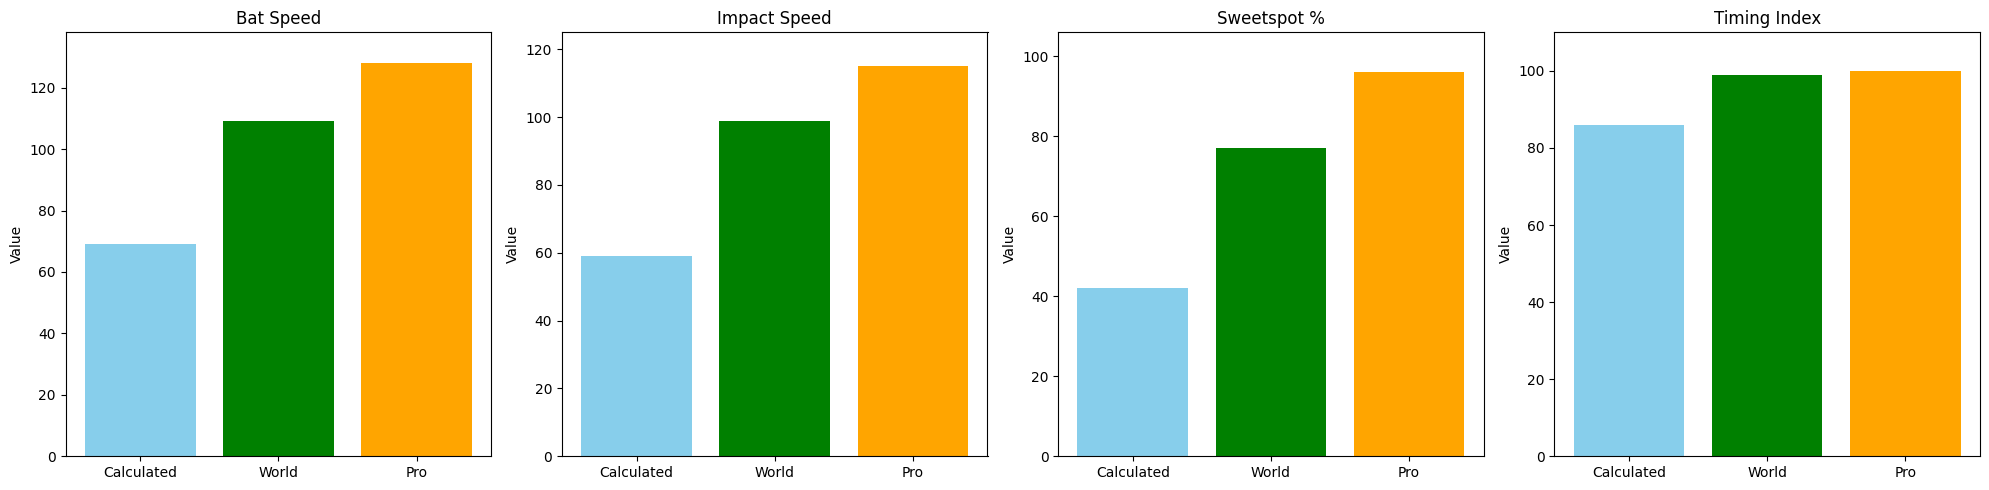

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'Session ID' and get the first row of each session
first_rows = data.groupby('Session ID').first().reset_index()

# Filter out rows with zero values in 'Bat Speed - Hits' or 'Impact Speed'
filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]

# Calculate Timing Index for each session as (Impact Speed / Bat Speed - Hits) * 100
filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

# Calculate the averages for each column
avg_bat_speed_hits = np.round(filtered_rows['Bat Speed - Hits'].mean())
avg_impact_speed = np.round(filtered_rows['Impact Speed'].mean())
avg_sweetspot = np.round(filtered_rows['Sweetspot %'].mean())
avg_timing_index = np.round(filtered_rows['Timing Index'].mean())

print("Average Bat Speed - Hits:", avg_bat_speed_hits)
print("Average Impact Speed:", avg_impact_speed)
print("Average Sweetspot %:", avg_sweetspot)
print("Average Timing Index:", avg_timing_index)

# Define world and pro benchmarks
world_benchmarks = {
    'Bat Speed': 109,
    'Impact Speed': 99,
    'Sweetspot %': 77,
    'Timing Index': 99
}

pro_benchmarks = {
    'Bat Speed': 128,
    'Impact Speed': 115,
    'Sweetspot %': 96,
    'Timing Index': 100
}

# Create 4 bar graphs with space between each group

# Data for plotting
metrics = ['Bat Speed', 'Impact Speed', 'Sweetspot %', 'Timing Index']
calculated_values = [avg_bat_speed_hits, avg_impact_speed, avg_sweetspot, avg_timing_index]
world_values = [world_benchmarks['Bat Speed'], world_benchmarks['Impact Speed'], world_benchmarks['Sweetspot %'], world_benchmarks['Timing Index']]
pro_values = [pro_benchmarks['Bat Speed'], pro_benchmarks['Impact Speed'], pro_benchmarks['Sweetspot %'], pro_benchmarks['Timing Index']]

# Set up the figure for the bar plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot each metric
for i, ax in enumerate(axes):
    ax.bar([0, 1, 2], [calculated_values[i], world_values[i], pro_values[i]], color=['skyblue', 'green', 'orange'])
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Calculated', 'World', 'Pro'])
    ax.set_title(metrics[i])
    ax.set_ylabel('Value')
    ax.set_ylim(0, max(calculated_values[i], world_values[i], pro_values[i]) + 10)  # Adjust y-axis for clarity

# Add some space between the plots
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
from PyPDF2 import PdfReader
import os

# Function to get PDF width and height
def get_pdf_dimensions(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        page = reader.pages[0]
        width = page.mediabox.width
        height = page.mediabox.height
    return width, height

# Example usage
pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"  # Replace with your PDF path
width, height = get_pdf_dimensions(pdf_path)

print(f'Width: {width}, Height: {height}')


Width: 842, Height: 595.000061


In [15]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PyPDF2 import PdfReader, PdfWriter

# Path to your input PDF (existing PDF to be overwritten)
input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"

# Path to save the output PDF with the name added
output_pdf_path = r"C:\Users\naikp\Downloads\Anurag6.pdf"

# Create a temporary PDF with the name added using reportlab
temp_pdf_path = "temp_page.pdf"
c = canvas.Canvas(temp_pdf_path, pagesize=(842, 595))  # Custom page size: Width: 842, Height: 595

# Set the font and size for the name (Helvetica-Bold for bold text)
font_name = "Helvetica-Bold"  # Bold font
font_size = 27  # You can adjust this as per your preference
c.setFont(font_name, font_size)

# Set font color to white
c.setFillColorRGB(1, 1, 1)  # White color

# Name to be added
name = "Pavan Naik"

# Position (x, y) where the name will be placed on the first page
x, y = 190, 165

# Write the name at the specified position
c.drawString(x, y, name)

# Save the canvas as a temporary PDF
c.save()

# Read the input PDF and the temporary page with the name
reader = PdfReader(input_pdf_path)
writer = PdfWriter()

# Merge the first page with the temporary page containing the name
first_page = reader.pages[0]
temp_pdf = PdfReader(temp_pdf_path).pages[0]

# Add the name on top of the first page
first_page.merge_page(temp_pdf)

# Add all pages to the writer, with the modified first page
writer.add_page(first_page)
for page in reader.pages[1:]:
    writer.add_page(page)

# Write the updated PDF to the output path
with open(output_pdf_path, "wb") as output_pdf:
    writer.write(output_pdf)

# Optionally, remove the temporary file
import os
os.remove(temp_pdf_path)

print(f"PDF updated and saved as {output_pdf_path}")


PDF updated and saved as C:\Users\naikp\Downloads\Anurag6.pdf


In [16]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PyPDF2 import PdfReader, PdfWriter
import os

# Path to your input PDF (existing PDF to be overwritten)
input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"

# Path to save the output PDF with the name added
output_pdf_path = r"C:\Users\naikp\Downloads\Anurag4.pdf"

# Create a temporary PDF with the name added using reportlab
temp_pdf_path = "temp_page_first.pdf"
c = canvas.Canvas(temp_pdf_path, pagesize=(842, 595))  # Custom page size: Width: 842, Height: 595

# Set the font and size for the name (Helvetica-Bold for bold text)
font_name = "Helvetica-Bold"  # Bold font
font_size = 27  # You can adjust this as per your preference
c.setFont(font_name, font_size)

# Set font color to white
c.setFillColorRGB(1, 1, 1)  # White color

# Name to be added
name = "Pavan Naik"

# Position (x, y) where the name will be placed on the first page
x, y = 190, 165

# Write the name at the specified position
c.drawString(x, y, name)

# Save the canvas as a temporary PDF
c.save()

# Create a temporary PDF for the fourth page with best shot details
temp_pdf_path_fourth = "temp_page_fourth.pdf"
c = canvas.Canvas(temp_pdf_path_fourth, pagesize=(842, 595))  # Custom page size: Width: 842, Height: 595

# Set the font and size for the name (Helvetica-Bold for bold text)
c.setFont(font_name, 27)

# Set font color to white for best shot details
c.setFillColorRGB(1, 1, 1)  # White color

# Best shot details (example values, these should be from your best shot calculation)
best_shot_details = {
    'Bat Speed': 45.0,        # Example value
    'Impact Speed': 60.5,     # Example value
    'Sweetspot %': 85.0,      # Example value
    'Shot Value': 45.0 * 85.0 * 60.5,  # Example value calculated
    'Session Name': "Session 1",  # Example value
    'Session Date': "2024-11-15"  # Example value
}

# Calculate the timing (Impact Speed / Bat Speed * 100)
timing = best_shot_details['Impact Speed'] / best_shot_details['Bat Speed'] * 100
best_shot_details['Shot Value'] = timing * best_shot_details['Sweetspot %']  # Update Shot Value

# Write the name at the specified position on the fourth page
c.drawString(383, 500, name)

# Write the numerical values on the fourth page without the labels
c.setFont(font_name, 16)

# Bat Speed, Impact Speed, Sweetspot, Timing
c.drawString(180, 290, f"{best_shot_details['Bat Speed']}")
c.drawString(180, 210, f"{best_shot_details['Impact Speed']}")
c.drawString(470, 210, f"{best_shot_details['Sweetspot %']}")
c.drawString(470, 290, f"{timing:.2f}")  # Print calculated timing

# Session Name and Date
c.drawString(230, 400, f"{best_shot_details['Session Name']}")
c.drawString(520, 400, f"{best_shot_details['Session Date']}")

# Save the canvas as a temporary PDF
c.save()

# Read the input PDF and the temporary pages with the name and best shot details
reader = PdfReader(input_pdf_path)
writer = PdfWriter()

# Merge the first page with the temporary page containing the name
first_page = reader.pages[0]
temp_pdf_first = PdfReader(temp_pdf_path).pages[0]
first_page.merge_page(temp_pdf_first)

# Add the modified first page
writer.add_page(first_page)

# Add remaining pages (2nd and 3rd pages)
for i in range(1, 3):
    writer.add_page(reader.pages[i])

# Merge the fourth page with the temporary page containing the name and best shot details
fourth_page = reader.pages[3]
temp_pdf_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
fourth_page.merge_page(temp_pdf_fourth)

# Add the modified fourth page
writer.add_page(fourth_page)

# Add the remaining pages (5th to last)
for page in reader.pages[4:]:
    writer.add_page(page)

# Write the updated PDF to the output path
with open(output_pdf_path, "wb") as output_pdf:
    writer.write(output_pdf)

# Optionally, remove the temporary files
os.remove(temp_pdf_path)
os.remove(temp_pdf_path_fourth)

print(f"PDF updated and saved as {output_pdf_path}")

# Logic for getting best shot details
# Initialize variables to store the best shot's details
best_shot_value = -float('inf')
best_shot_details = {}

# Iterate through each session ID and calculate the best shot
for session_id in data['Session ID'].unique():
    # Filter the data for the current session
    session_data = data[data['Session ID'] == session_id]
    
    # Exclude the first row of each session for further calculations
    session_data_excluding_first_row = session_data.iloc[1:]
    
    # Iterate over the rows and calculate shot value for each hit shot
    for idx, row in session_data_excluding_first_row.iterrows():
        # Check if the shot is a hit (1 in any of the offside/leg side columns)
        if row['Backfoot'] == 1 or row['On The Crease'] == 1 or row['Frontfoot'] == 1 or row['FINE_LEG'] == 1 or row['SQUARE_LEG'] == 1 or row['MID_WICKET'] == 1 or row['LONG_ON'] == 1 or row['LONG_OFF'] == 1 or row['COVER'] == 1 or row['POINT'] == 1 or row['THIRD_MAN'] == 1:
            # Calculate Shot Value (Bat Speed * Sweetspot % * Impact Speed)
            shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
            
            # Calculate Timing (Impact Speed / Bat Speed * 100)
            timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
            
            # If this shot has a higher value, update the best shot details
            if shot_value > best_shot_value:
                best_shot_value = shot_value
                best_shot_details = {
                    'Bat Speed': row['Bat Speed - Hits'],
                    'Impact Speed': row['Impact Speed'],
                    'Sweetspot %': row['Sweetspot %'],
                    'Shot Value': shot_value,
                    'Timing': timing,  # Add Timing to the best shot details
                    'Session ID': session_id
                }

# Print the best shot's details
if best_shot_details:
    print(f"Best Shot Details (Session ID: {best_shot_details['Session ID']}):")
    print(f"Bat Speed: {best_shot_details['Bat Speed']}")
    print(f"Impact Speed: {best_shot_details['Impact Speed']}")
    print(f"Sweetspot %: {best_shot_details['Sweetspot %']}")
    print(f"Shot Value (Bat Speed * Sweetspot % * Impact Speed): {best_shot_details['Shot Value']}")
    print(f"Timing (Impact Speed / Bat Speed * 100): {best_shot_details['Timing']}")
else:
    print("No valid shot found.")


PDF updated and saved as C:\Users\naikp\Downloads\Anurag4.pdf
Best Shot Details (Session ID: 8689):
Bat Speed: 71.0
Impact Speed: 67.0
Sweetspot %: 50.0
Shot Value (Bat Speed * Sweetspot % * Impact Speed): 237850.0
Timing (Impact Speed / Bat Speed * 100): 94.36619718309859


In [17]:
import os
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PyPDF2 import PdfReader, PdfWriter

# Paths for input and output PDFs
input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
output_pdf_path = r"C:\Users\naikp\Downloads\Anurag815.pdf"

# Temporary file paths
temp_pdf_path_first = "temp_page_first.pdf"
temp_pdf_path_fourth = "temp_page_fourth.pdf"
temp_pdf_path_fifth = "temp_page_fifth.pdf"




# Data Processing
best_shot_value = -float('inf')
best_shot_details = {}

# Calculate best shot and aggregate stats
unique_sessions = data['Session ID'].nunique()
total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

first_rows = data.groupby('Session ID').first().reset_index()
filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]
filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
avg_timing_index = round(filtered_rows['Timing Index'].mean())

for session_id in data['Session ID'].unique():
    session_data = data[data['Session ID'] == session_id]
    session_data_excluding_first_row = session_data.iloc[1:]

    for _, row in session_data_excluding_first_row.iterrows():
        if any(row[hit] == 1 for hit in ['Backfoot', 'On The Crease', 'Frontfoot', 
                                         'FINE_LEG', 'SQUARE_LEG', 'MID_WICKET', 
                                         'LONG_ON', 'LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']):
            shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
            timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
            if shot_value > best_shot_value:
                best_shot_value = shot_value
                best_shot_details = {
                    'Bat Speed': row['Bat Speed - Hits'],
                    'Impact Speed': row['Impact Speed'],
                    'Sweetspot %': row['Sweetspot %'],
                    #'Shot Value': shot_value,
                    'Timing': timing,
                    'Session ID': session_id
                }

# Round off best shot details
rounded_details = {key: round(value) for key, value in best_shot_details.items() if key != 'Session ID'}

# Fifth Page Stats
fifth_page_data = {
    "Total Sessions": unique_sessions,
    "Total Shots": round(total_shots),
    "Average Bat Speed": avg_bat_speed_hits,
    "Average Impact Speed": avg_impact_speed,
    "Average Sweetspot %": avg_sweetspot,
    "Average Timing Index": avg_timing_index,
}

# Generate temporary pages
def create_temp_pdf(path, text_data, positions, font_size=16):
    c = canvas.Canvas(path, pagesize=(842, 595))
    c.setFont("Helvetica-Bold", font_size)
    for key, value in text_data.items():
        x, y = positions[key]
        c.drawString(x, y, f"{key}: {value}")
    c.save()

# Page-specific details
positions_fifth = {
    "Total Sessions": (150, 500),
    "Total Shots": (150, 450),
    "Average Bat Speed": (150, 400),
    "Average Impact Speed": (150, 350),
    "Average Sweetspot %": (150, 300),
    "Average Timing Index": (150, 250),
}

create_temp_pdf(temp_pdf_path_first, {"Name": "Pavan Naik"}, {"Name": (190, 165)}, font_size=27)
create_temp_pdf(temp_pdf_path_fourth, rounded_details, {
    "Bat Speed": (180, 290),
    "Impact Speed": (180, 210),
    "Sweetspot %": (470, 210),
    "Timing": (470, 290),
}, font_size=16)
create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth)

# Read and modify the PDF
reader = PdfReader(input_pdf_path)
writer = PdfWriter()

# Merge pages
for i, page in enumerate(reader.pages):
    if i == 0:
        temp_first = PdfReader(temp_pdf_path_first).pages[0]
        page.merge_page(temp_first)
    elif i == 3:
        temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
        page.merge_page(temp_fourth)
    elif i == 4:
        temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
        page.merge_page(temp_fifth)
    writer.add_page(page)

# Write updated PDF
with open(output_pdf_path, "wb") as output_pdf:
    writer.write(output_pdf)

# Clean up temporary files
for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth]:
    os.remove(temp_path)

print(f"PDF updated and saved as {output_pdf_path}")


C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\4092495701.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


PDF updated and saved as C:\Users\naikp\Downloads\Anurag815.pdf


In [18]:
import os
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
from datetime import datetime

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_path_first = "temp_page_first.pdf"
    temp_pdf_path_fourth = "temp_page_fourth.pdf"
    temp_pdf_path_fifth = "temp_page_fifth.pdf"

    # Data Processing
    best_shot_value = -float('inf')
    best_shot_details = {}

    # Calculate best shot and aggregate stats
    unique_sessions = data['Session ID'].nunique()
    total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

    first_rows = data.groupby('Session ID').first().reset_index()
    filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]
    filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

    avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
    avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
    avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
    avg_timing_index = round(filtered_rows['Timing Index'].mean())

    current_date = datetime.now().strftime("%d-%m-%Y")

    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]

        for _, row in session_data_excluding_first_row.iterrows():
            if any(row[hit] == 1 for hit in ['Backfoot', 'On The Crease', 'Frontfoot', 
                                           'FINE_LEG', 'SQUARE_LEG', 'MID_WICKET', 
                                           'LONG_ON', 'LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']):
                shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
                timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
                if shot_value > best_shot_value:
                    best_shot_value = shot_value
                    best_shot_details = {
                        'Name': name,
                        'Session ID': session_id,
                        'Date': current_date,
                        'Bat Speed': row['Bat Speed - Hits'],
                        'Impact Speed': row['Impact Speed'],
                        'Sweetspot %': row['Sweetspot %'],
                        'Timing': timing
                    }

    # Round off best shot details
    rounded_details = {}
    for key, value in best_shot_details.items():
        if key in ['Name', 'Session ID', 'Date']:
            rounded_details[key] = str(value)
        else:
            rounded_details[key] = str(round(value))

    # Fifth Page Stats
    fifth_page_data = {
        "Total Sessions": str(unique_sessions),
        "Total Shots": str(round(total_shots)),
        "Average Bat Speed": str(avg_bat_speed_hits),
        "Average Impact Speed": str(avg_impact_speed),
        "Average Sweetspot %": str(avg_sweetspot),
        "Average Timing Index": str(avg_timing_index),
    }

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Page-specific positions
    positions_fifth = {
        "Total Sessions": (150, 500),
        "Total Shots": (150, 450),
        "Average Bat Speed": (150, 400),
        "Average Impact Speed": (150, 350),
        "Average Sweetspot %": (150, 300),
        "Average Timing Index": (150, 250),
    }

    positions_fourth = {
        "Name": (383, 500),
        "Session ID": (230, 400),
        "Date": (520, 400),
        "Bat Speed": (180, 290),
        "Impact Speed": (180, 210),
        "Sweetspot %": (470, 210),
        "Timing": (470, 290),
    }

    # Create temporary PDFs
    create_temp_pdf(temp_pdf_path_first, {"Name": name}, {"Name": (190, 165)}, font_size=27, text_color=colors.black)
    create_temp_pdf(temp_pdf_path_fourth, rounded_details, positions_fourth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth, font_size=16, text_color=colors.white)

    # Read and modify the PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Merge pages
    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_path_first).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
            page.merge_page(temp_fifth)
        writer.add_page(page)

    # Write updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth]:
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")

# Example usage:
input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
output_pdf_path = r"C:\Users\naikp\Downloads\Anurag02.pdf"
name = "Your Name Here"  # Variable name that can be changed

# Assuming 'data' is your DataFrame
generate_pdf(name, data, input_pdf_path, output_pdf_path)

C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\1402388783.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


PDF updated and saved as C:\Users\naikp\Downloads\Anurag02.pdf


In [19]:
import os
import pandas as pd
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
from datetime import datetime

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_path_first = "temp_page_first.pdf"
    temp_pdf_path_fourth = "temp_page_fourth.pdf"
    temp_pdf_path_fifth = "temp_page_fifth.pdf"
    temp_pdf_path_seventh = "temp_page_seventh.pdf"

    # Data Processing
    best_shot_value = -float('inf')
    best_shot_details = {}

    # Calculate best shot and aggregate stats
    unique_sessions = data['Session ID'].nunique()
    total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

    first_rows = data.groupby('Session ID').first().reset_index()
    filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]
    filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

    avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
    avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
    avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
    avg_timing_index = round(filtered_rows['Timing Index'].mean())

    current_date = datetime.now().strftime("%d-%m-%Y")

    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]

        for _, row in session_data_excluding_first_row.iterrows():
            if any(row[hit] == 1 for hit in ['Backfoot', 'On The Crease', 'Frontfoot', 
                                           'FINE_LEG', 'SQUARE_LEG', 'MID_WICKET', 
                                           'LONG_ON', 'LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']):
                shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
                timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
                if shot_value > best_shot_value:
                    best_shot_value = shot_value
                    best_shot_details = {
                        'Name': name,
                        'Session ID': session_id,
                        'Date': current_date,
                        'Bat Speed': row['Bat Speed - Hits'],
                        'Impact Speed': row['Impact Speed'],
                        'Sweetspot %': row['Sweetspot %'],
                        'Timing': timing
                    }

    # Round off best shot details
    rounded_details = {}
    for key, value in best_shot_details.items():
        if key in ['Name', 'Session ID', 'Date']:
            rounded_details[key] = str(value)
        else:
            rounded_details[key] = str(round(value))

    # Fifth Page Stats
    fifth_page_data = {
        "Total Sessions": str(unique_sessions),
        "Total Shots": str(round(total_shots)),
        "Average Bat Speed": str(avg_bat_speed_hits),
        "Average Impact Speed": str(avg_impact_speed),
        "Average Sweetspot %": str(avg_sweetspot),
        "Average Timing Index": str(avg_timing_index),
    }

    # Calculate 7th page stats
    data[['Backfoot', 'On The Crease', 'Frontfoot']] = data[['Backfoot', 'On The Crease', 'Frontfoot']].fillna(0)
    first_rows_shot = data.groupby('Session ID').first().reset_index()
    
    avg_backfoot = np.round(first_rows_shot[first_rows_shot['Backfoot'] != 0]['Backfoot'].mean()) if not first_rows_shot[first_rows_shot['Backfoot'] != 0].empty else 0
    avg_on_crease = np.round(first_rows_shot[first_rows_shot['On The Crease'] != 0]['On The Crease'].mean()) if not first_rows_shot[first_rows_shot['On The Crease'] != 0].empty else 0
    avg_frontfoot = np.round(first_rows_shot[first_rows_shot['Frontfoot'] != 0]['Frontfoot'].mean()) if not first_rows_shot[first_rows_shot['Frontfoot'] != 0].empty else 0

    # Seventh Page Stats
    seventh_page_data = {
        "backfoot": str(int(avg_backfoot)),
        "oncrease": str(int(avg_on_crease)),
        "frontfoot": str(int(avg_frontfoot))
    }

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Page-specific positions
    positions_fifth = {
        "Total Sessions": (150, 500),
        "Total Shots": (150, 450),
        "Average Bat Speed": (150, 400),
        "Average Impact Speed": (150, 350),
        "Average Sweetspot %": (150, 300),
        "Average Timing Index": (150, 250),
    }

    positions_fourth = {
        "Name": (383, 500),
        "Session ID": (230, 400),
        "Date": (520, 400),
        "Bat Speed": (180, 290),
        "Impact Speed": (180, 210),
        "Sweetspot %": (470, 210),
        "Timing": (470, 290),
    }

    positions_seventh = {
        "backfoot": (180, 290),
        "oncrease": (380, 290),
        "frontfoot": (580, 290)
    }

    # Create temporary PDFs
    create_temp_pdf(temp_pdf_path_first, {"Name": name}, {"Name": (190, 165)}, font_size=27, text_color=colors.black)
    create_temp_pdf(temp_pdf_path_fourth, rounded_details, positions_fourth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_seventh, seventh_page_data, positions_seventh, font_size=16, text_color=colors.white)

    # Read and modify the PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Merge pages
    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_path_first).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
            page.merge_page(temp_fifth)
        elif i == 6:  # 7th page
            temp_seventh = PdfReader(temp_pdf_path_seventh).pages[0]
            page.merge_page(temp_seventh)
        writer.add_page(page)

    # Write updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth, temp_pdf_path_seventh]:
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")

# Example usage:
if __name__ == "__main__":
    # Replace these paths with your actual paths
    input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
    output_pdf_path = r"C:\Users\naikp\Downloads\Anurag03.pdf"
    name = "Your Name Here"  # Replace with the actual name

    # Read your data
    # Assuming you have your data in a CSV or similar format
    # data = pd.read_csv('your_data.csv')  # Uncomment and modify this line
    
    # Generate the PDF
generate_pdf(name, data, input_pdf_path, output_pdf_path)  # Uncomment this line when ready

C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\1583449851.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


PDF updated and saved as C:\Users\naikp\Downloads\Anurag03.pdf


In [20]:
import os
import pandas as pd
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
from datetime import datetime

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_path_first = "temp_page_first.pdf"
    temp_pdf_path_fourth = "temp_page_fourth.pdf"
    temp_pdf_path_fifth = "temp_page_fifth.pdf"
    temp_pdf_path_sixth = "temp_page_sixth.pdf"  # Added for sixth page
    temp_pdf_path_seventh = "temp_page_seventh.pdf"

    # Data Processing
    best_shot_value = -float('inf')
    best_shot_details = {}

    # Calculate best shot and aggregate stats
    unique_sessions = data['Session ID'].nunique()
    total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

    first_rows = data.groupby('Session ID').first().reset_index()
    filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)]
    filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

    avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
    avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
    avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
    avg_timing_index = round(filtered_rows['Timing Index'].mean())

    current_date = datetime.now().strftime("%d-%m-%Y")

    # Calculate sixth page stats
    offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
    leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']
    
    total_grounded_offside = 0
    total_offside_shots = 0
    total_grounded_leg_side = 0
    total_leg_side_shots = 0

    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]
        
        for column in offside_columns:
            offside_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_offside += ((offside_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_offside_shots += (offside_shots == 1).sum()
        
        for column in leg_side_columns:
            leg_side_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_leg_side += ((leg_side_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_leg_side_shots += (leg_side_shots == 1).sum()

    grounded_offside_percentage = round((total_grounded_offside / total_offside_shots * 100) if total_offside_shots != 0 else 0)
    grounded_leg_side_percentage = round((total_grounded_leg_side / total_leg_side_shots * 100) if total_leg_side_shots != 0 else 0)

    # Sixth Page Stats
    sixth_page_data = {
        "total_offside_shots": str(total_offside_shots),
        "total_leg_side_shots": str(total_leg_side_shots),
        "grounded_offside_percentage": str(grounded_offside_percentage),
        "grounded_leg_side_percentage": str(grounded_leg_side_percentage)
    }

    # [Previous code for best shot calculation remains the same]

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # [Previous positions definitions remain the same]

    # Add positions for sixth page
    positions_sixth = {
        "total_offside_shots": (180, 290),      # Adjust these coordinates as needed
        "total_leg_side_shots": (380, 290),     # to match your PDF template
        "grounded_offside_percentage": (180, 210),
        "grounded_leg_side_percentage": (380, 210)
    }

    # Create temporary PDFs
    create_temp_pdf(temp_pdf_path_first, {"Name": name}, {"Name": (190, 165)}, font_size=27, text_color=colors.black)
    create_temp_pdf(temp_pdf_path_fourth, rounded_details, positions_fourth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_sixth, sixth_page_data, positions_sixth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_seventh, seventh_page_data, positions_seventh, font_size=16, text_color=colors.white)

    # Read and modify the PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Merge pages
    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_path_first).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
            page.merge_page(temp_fifth)
        elif i == 5:  # 6th page
            temp_sixth = PdfReader(temp_pdf_path_sixth).pages[0]
            page.merge_page(temp_sixth)
        elif i == 6:  # 7th page
            temp_seventh = PdfReader(temp_pdf_path_seventh).pages[0]
            page.merge_page(temp_seventh)
        writer.add_page(page)

    # Write updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth, 
                     temp_pdf_path_sixth, temp_pdf_path_seventh]:
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")

# Example usage remains the same as before
if __name__ == "__main__":
    input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
    output_pdf_path = r"C:\Users\naikp\Downloads\Anurag04.pdf"
    name = "Your Name Here"
    
    generate_pdf(name, data, input_pdf_path, output_pdf_path)

C:\Users\naikp\AppData\Local\Temp\ipykernel_3144\549316985.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()


NameError: name 'positions_fourth' is not defined

In [21]:
import os
import pandas as pd
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
from datetime import datetime

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_path_first = "temp_page_first.pdf"
    temp_pdf_path_fourth = "temp_page_fourth.pdf"
    temp_pdf_path_fifth = "temp_page_fifth.pdf"
    temp_pdf_path_sixth = "temp_page_sixth.pdf"
    temp_pdf_path_seventh = "temp_page_seventh.pdf"

    # Data Processing
    best_shot_value = -float('inf')
    best_shot_details = {}
    current_date = datetime.now().strftime("%d-%m-%Y")

    # Calculate best shot and aggregate stats
    unique_sessions = data['Session ID'].nunique()
    total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

    first_rows = data.groupby('Session ID').first().reset_index()
    filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)].copy()  # Added .copy()
    filtered_rows.loc[:, 'Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

    avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
    avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
    avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
    avg_timing_index = round(filtered_rows['Timing Index'].mean())

    # Calculate best shot details
    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]

        for _, row in session_data_excluding_first_row.iterrows():
            if any(row[hit] == 1 for hit in ['Backfoot', 'On The Crease', 'Frontfoot', 
                                           'FINE_LEG', 'SQUARE_LEG', 'MID_WICKET', 
                                           'LONG_ON', 'LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']):
                shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
                timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
                if shot_value > best_shot_value:
                    best_shot_value = shot_value
                    best_shot_details = {
                        'Name': name,
                        'Session ID': session_id,
                        'Date': current_date,
                        'Bat Speed': row['Bat Speed - Hits'],
                        'Impact Speed': row['Impact Speed'],
                        'Sweetspot %': row['Sweetspot %'],
                        'Timing': timing
                    }

    # Round off best shot details
    rounded_details = {}
    for key, value in best_shot_details.items():
        if key in ['Name', 'Session ID', 'Date']:
            rounded_details[key] = str(value)
        else:
            rounded_details[key] = str(round(value))

    # Calculate sixth page stats
    offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
    leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']
    
    total_grounded_offside = 0
    total_offside_shots = 0
    total_grounded_leg_side = 0
    total_leg_side_shots = 0

    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]
        
        for column in offside_columns:
            offside_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_offside += ((offside_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_offside_shots += (offside_shots == 1).sum()
        
        for column in leg_side_columns:
            leg_side_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_leg_side += ((leg_side_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_leg_side_shots += (leg_side_shots == 1).sum()

    grounded_offside_percentage = round((total_grounded_offside / total_offside_shots * 100) if total_offside_shots != 0 else 0)
    grounded_leg_side_percentage = round((total_grounded_leg_side / total_leg_side_shots * 100) if total_leg_side_shots != 0 else 0)

    # Fifth Page Stats
    fifth_page_data = {
        "Total Sessions": str(unique_sessions),
        "Total Shots": str(round(total_shots)),
        "Average Bat Speed": str(avg_bat_speed_hits),
        "Average Impact Speed": str(avg_impact_speed),
        "Average Sweetspot %": str(avg_sweetspot),
        "Average Timing Index": str(avg_timing_index),
    }

    # Sixth Page Stats
    sixth_page_data = {
        "total_offside_shots": str(total_offside_shots),
        "total_leg_side_shots": str(total_leg_side_shots),
        "grounded_offside_percentage": str(grounded_offside_percentage),
        "grounded_leg_side_percentage": str(grounded_leg_side_percentage)
    }

    # Calculate 7th page stats
    data[['Backfoot', 'On The Crease', 'Frontfoot']] = data[['Backfoot', 'On The Crease', 'Frontfoot']].fillna(0)
    first_rows_shot = data.groupby('Session ID').first().reset_index()
    
    avg_backfoot = np.round(first_rows_shot[first_rows_shot['Backfoot'] != 0]['Backfoot'].mean()) if not first_rows_shot[first_rows_shot['Backfoot'] != 0].empty else 0
    avg_on_crease = np.round(first_rows_shot[first_rows_shot['On The Crease'] != 0]['On The Crease'].mean()) if not first_rows_shot[first_rows_shot['On The Crease'] != 0].empty else 0
    avg_frontfoot = np.round(first_rows_shot[first_rows_shot['Frontfoot'] != 0]['Frontfoot'].mean()) if not first_rows_shot[first_rows_shot['Frontfoot'] != 0].empty else 0

    # Seventh Page Stats
    seventh_page_data = {
        "backfoot": str(int(avg_backfoot)),
        "oncrease": str(int(avg_on_crease)),
        "frontfoot": str(int(avg_frontfoot))
    }

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Position definitions
    positions_fourth = {
        "Name": (383, 500),
        "Session ID": (230, 400),
        "Date": (520, 400),
        "Bat Speed": (180, 290),
        "Impact Speed": (180, 210),
        "Sweetspot %": (470, 210),
        "Timing": (470, 290),
    }

    positions_fifth = {
        "Total Sessions": (150, 500),
        "Total Shots": (150, 450),
        "Average Bat Speed": (150, 400),
        "Average Impact Speed": (150, 350),
        "Average Sweetspot %": (150, 300),
        "Average Timing Index": (150, 250),
    }

    positions_sixth = {
        "total_offside_shots": (180, 290),
        "total_leg_side_shots": (380, 290),
        "grounded_offside_percentage": (180, 210),
        "grounded_leg_side_percentage": (380, 210)
    }

    positions_seventh = {
        "backfoot": (180, 290),
        "oncrease": (380, 290),
        "frontfoot": (580, 290)
    }

    # Create temporary PDFs
    create_temp_pdf(temp_pdf_path_first, {"Name": name}, {"Name": (190, 165)}, font_size=27, text_color=colors.black)
    create_temp_pdf(temp_pdf_path_fourth, rounded_details, positions_fourth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_sixth, sixth_page_data, positions_sixth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_seventh, seventh_page_data, positions_seventh, font_size=16, text_color=colors.white)

    # Read and modify the PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Merge pages
    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_path_first).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
            page.merge_page(temp_fifth)
        elif i == 5:  # 6th page
            temp_sixth = PdfReader(temp_pdf_path_sixth).pages[0]
            page.merge_page(temp_sixth)
        elif i == 6:  # 7th page
            temp_seventh = PdfReader(temp_pdf_path_seventh).pages[0]
            page.merge_page(temp_seventh)
        writer.add_page(page)

    # Write updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth, 
                     temp_pdf_path_sixth, temp_pdf_path_seventh]:
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")

# Example usage
if __name__ == "__main__":
    input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
    output_pdf_path = r"C:\Users\naikp\Downloads\Anurag05.pdf"
    name = "Your Name Here"
    
    generate_pdf(name, data, input_pdf_path, output_pdf_path)

PDF updated and saved as C:\Users\naikp\Downloads\Anurag05.pdf


In [22]:
import os
import pandas as pd
import numpy as np
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter
from datetime import datetime

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_path_first = "temp_page_first.pdf"
    temp_pdf_path_fourth = "temp_page_fourth.pdf"
    temp_pdf_path_fifth = "temp_page_fifth.pdf"
    temp_pdf_path_sixth = "temp_page_sixth.pdf"
    temp_pdf_path_seventh = "temp_page_seventh.pdf"
    

    # Data Processing
    best_shot_value = -float('inf')
    best_shot_details = {}
    current_date = datetime.now().strftime("%d-%m-%Y")

    # Calculate best shot and aggregate stats
    unique_sessions = data['Session ID'].nunique()
    total_shots = data['Total Shots'].apply(pd.to_numeric, errors='coerce').sum()

    first_rows = data.groupby('Session ID').first().reset_index()
    filtered_rows = first_rows[(first_rows['Bat Speed - Hits'] != 0) & (first_rows['Impact Speed'] != 0)].copy()  # Added .copy()
    filtered_rows.loc[:, 'Timing Index'] = ((filtered_rows['Impact Speed'] / filtered_rows['Bat Speed - Hits']) * 100).round()

    avg_bat_speed_hits = round(filtered_rows['Bat Speed - Hits'].mean())
    avg_impact_speed = round(filtered_rows['Impact Speed'].mean())
    avg_sweetspot = round(filtered_rows['Sweetspot %'].mean())
    avg_timing_index = round(filtered_rows['Timing Index'].mean())

    # Calculate best shot details
    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]

        for _, row in session_data_excluding_first_row.iterrows():
            if any(row[hit] == 1 for hit in ['Backfoot', 'On The Crease', 'Frontfoot', 
                                           'FINE_LEG', 'SQUARE_LEG', 'MID_WICKET', 
                                           'LONG_ON', 'LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']):
                shot_value = row['Bat Speed - Hits'] * row['Sweetspot %'] * row['Impact Speed']
                timing = row['Impact Speed'] / row['Bat Speed - Hits'] * 100
                if shot_value > best_shot_value:
                    best_shot_value = shot_value
                    best_shot_details = {
                        'Name': name,
                        'Session ID': session_id,
                        'Date': current_date,
                        'Bat Speed': row['Bat Speed - Hits'],
                        'Impact Speed': row['Impact Speed'],
                        'Sweetspot %': row['Sweetspot %'],
                        'Timing': timing
                    }

    # Round off best shot details
    rounded_details = {}
    for key, value in best_shot_details.items():
        if key in ['Name', 'Session ID', 'Date']:
            rounded_details[key] = str(value)
        else:
            rounded_details[key] = str(round(value))

    # Calculate sixth page stats
    offside_columns = ['LONG_OFF', 'COVER', 'POINT', 'THIRD_MAN']
    leg_side_columns = ['LONG_ON', 'MID_WICKET', 'SQUARE_LEG', 'FINE_LEG']
    
    total_grounded_offside = 0
    total_offside_shots = 0
    total_grounded_leg_side = 0
    total_leg_side_shots = 0

    for session_id in data['Session ID'].unique():
        session_data = data[data['Session ID'] == session_id]
        session_data_excluding_first_row = session_data.iloc[1:]
        
        for column in offside_columns:
            offside_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_offside += ((offside_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_offside_shots += (offside_shots == 1).sum()
        
        for column in leg_side_columns:
            leg_side_shots = session_data_excluding_first_row[column]
            grounded_or_aerial = session_data_excluding_first_row['Grounded/Aerial']
            
            total_grounded_leg_side += ((leg_side_shots == 1) & (grounded_or_aerial == 'G')).sum()
            total_leg_side_shots += (leg_side_shots == 1).sum()

    grounded_offside_percentage = round((total_grounded_offside / total_offside_shots * 100) if total_offside_shots != 0 else 0)
    grounded_leg_side_percentage = round((total_grounded_leg_side / total_leg_side_shots * 100) if total_leg_side_shots != 0 else 0)

    # Fifth Page Stats
    fifth_page_data = {
        "Total Sessions": str(unique_sessions),
        "Total Shots": str(round(total_shots)),
        "Average Bat Speed": str(avg_bat_speed_hits),
        "Average Impact Speed": str(avg_impact_speed),
        "Average Sweetspot %": str(avg_sweetspot),
        "Average Timing Index": str(avg_timing_index),
    }

    # Sixth Page Stats
    sixth_page_data = {
        "total_offside_shots": str(total_offside_shots),
        "total_leg_side_shots": str(total_leg_side_shots),
        "grounded_offside_percentage": str(grounded_offside_percentage),
        "grounded_leg_side_percentage": str(grounded_leg_side_percentage)
    }

    # Calculate 7th page stats
    data[['Backfoot', 'On The Crease', 'Frontfoot']] = data[['Backfoot', 'On The Crease', 'Frontfoot']].fillna(0)
    first_rows_shot = data.groupby('Session ID').first().reset_index()
    
    avg_backfoot = np.round(first_rows_shot[first_rows_shot['Backfoot'] != 0]['Backfoot'].mean()) if not first_rows_shot[first_rows_shot['Backfoot'] != 0].empty else 0
    avg_on_crease = np.round(first_rows_shot[first_rows_shot['On The Crease'] != 0]['On The Crease'].mean()) if not first_rows_shot[first_rows_shot['On The Crease'] != 0].empty else 0
    avg_frontfoot = np.round(first_rows_shot[first_rows_shot['Frontfoot'] != 0]['Frontfoot'].mean()) if not first_rows_shot[first_rows_shot['Frontfoot'] != 0].empty else 0

    # Seventh Page Stats
    seventh_page_data = {
        "backfoot": str(int(avg_backfoot)),
        "oncrease": str(int(avg_on_crease)),
        "frontfoot": str(int(avg_frontfoot))
    }

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Position definitions
    positions_fourth = {
        "Name": (383, 500),
        "Session ID": (230, 400),
        "Date": (520, 400),
        "Bat Speed": (180, 290),
        "Impact Speed": (180, 210),
        "Sweetspot %": (470, 210),
        "Timing": (470, 290),
    }

    positions_fifth = {
        "Total Sessions": (150, 500),
        "Total Shots": (150, 450),
        "Average Bat Speed": (150, 400),
        "Average Impact Speed": (150, 350),
        "Average Sweetspot %": (150, 300),
        "Average Timing Index": (150, 250),
    }

    positions_sixth = {
        "total_offside_shots": (180, 290),
        "total_leg_side_shots": (380, 290),
        "grounded_offside_percentage": (180, 210),
        "grounded_leg_side_percentage": (380, 210)
    }

    positions_seventh = {
        "backfoot": (180, 290),
        "oncrease": (380, 290),
        "frontfoot": (580, 290)
    }

    # Create temporary PDFs
    create_temp_pdf(temp_pdf_path_first, {"Name": name}, {"Name": (190, 165)}, font_size=27, text_color=colors.black)
    create_temp_pdf(temp_pdf_path_fourth, rounded_details, positions_fourth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_fifth, fifth_page_data, positions_fifth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_sixth, sixth_page_data, positions_sixth, font_size=16, text_color=colors.white)
    create_temp_pdf(temp_pdf_path_seventh, seventh_page_data, positions_seventh, font_size=16, text_color=colors.white)

    # Read and modify the PDF
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    # Merge pages
    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_path_first).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_path_fourth).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_path_fifth).pages[0]
            page.merge_page(temp_fifth)
        elif i == 5:  # 6th page
            temp_sixth = PdfReader(temp_pdf_path_sixth).pages[0]
            page.merge_page(temp_sixth)
        elif i == 6:  # 7th page
            temp_seventh = PdfReader(temp_pdf_path_seventh).pages[0]
            page.merge_page(temp_seventh)
        writer.add_page(page)

    # Write updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in [temp_pdf_path_first, temp_pdf_path_fourth, temp_pdf_path_fifth, 
                     temp_pdf_path_sixth, temp_pdf_path_seventh]:
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")

# Example usage
if __name__ == "__main__":
    input_pdf_path = r"C:\Users\naikp\Downloads\Anurag.pdf"
    output_pdf_path = r"C:\Users\naikp\Downloads\Anurag05.pdf"
    name = "Your Name Here"
    
    generate_pdf(name, data, input_pdf_path, output_pdf_path)

PDF updated and saved as C:\Users\naikp\Downloads\Anurag05.pdf


In [23]:
import random

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_paths = {
        "first": "temp_page_first.pdf",
        "fourth": "temp_page_fourth.pdf",
        "fifth": "temp_page_fifth.pdf",
        "sixth": "temp_page_sixth.pdf",
        "seventh": "temp_page_seventh.pdf",
        "eighth": "temp_page_eighth.pdf",
        "ninth": "temp_page_ninth.pdf",
    }

    # Existing processing logic...

    # Calculate 8th and 9th page data
    first_session_id = data['Session ID'].iloc[0]  # First session ID
    last_session_id = data['Session ID'].iloc[-1]  # Last session ID

    # First session details
    first_session_data = data[data['Session ID'] == first_session_id].iloc[0]
    last_session_data = data[data['Session ID'] == last_session_id].iloc[0]

    first_bat_speed = round(first_session_data['Bat Speed - Hits'] if first_session_data['Bat Speed - Hits'] != 0 else first_session_data['Bat Speed - Misses'])
    first_impact_speed = round(first_session_data['Impact Speed'])
    first_sweetspot = round(first_session_data['Sweetspot %'])
    first_timing_index = math.floor((first_impact_speed / first_bat_speed) * 100) if first_bat_speed != 0 else 0

    # Last session details
    last_bat_speed = round(last_session_data['Bat Speed - Hits'] if last_session_data['Bat Speed - Hits'] != 0 else last_session_data['Bat Speed - Misses'])
    last_impact_speed = round(last_session_data['Impact Speed'])
    last_sweetspot = round(last_session_data['Sweetspot %'])
    last_timing_index = math.floor((last_impact_speed / last_bat_speed) * 100) if last_bat_speed != 0 else 0

    eighth_page_data = {
        "first_bat_speed": str(first_bat_speed),
        "first_impact_speed": str(first_impact_speed),
        "first_sweetspot": str(first_sweetspot),
        "first_timing_index": str(first_timing_index),
    }

    ninth_page_data = {
        "last_bat_speed": str(last_bat_speed),
        "last_impact_speed": str(last_impact_speed),
        "last_sweetspot": str(last_sweetspot),
        "last_timing_index": str(last_timing_index),
    }

    def generate_random_positions(keys, page_width=842, page_height=595):
        return {key: (random.randint(50, page_width - 50), random.randint(50, page_height - 50)) for key in keys}

    positions_eighth = generate_random_positions(eighth_page_data.keys())
    positions_ninth = generate_random_positions(ninth_page_data.keys())

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Create temporary PDFs for 8th and 9th pages
    create_temp_pdf(temp_pdf_paths["eighth"], eighth_page_data, positions_eighth)
    create_temp_pdf(temp_pdf_paths["ninth"], ninth_page_data, positions_ninth)

    # Existing logic to read and modify the PDF...
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_paths["first"]).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_paths["fourth"]).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_paths["fifth"]).pages[0]
            page.merge_page(temp_fifth)
        elif i == 5:
            temp_sixth = PdfReader(temp_pdf_paths["sixth"]).pages[0]
            page.merge_page(temp_sixth)
        elif i == 6:
            temp_seventh = PdfReader(temp_pdf_paths["seventh"]).pages[0]
            page.merge_page(temp_seventh)
        elif i == 7:  # 8th page
            temp_eighth = PdfReader(temp_pdf_paths["eighth"]).pages[0]
            page.merge_page(temp_eighth)
        elif i == 8:  # 9th page
            temp_ninth = PdfReader(temp_pdf_paths["ninth"]).pages[0]
            page.merge_page(temp_ninth)
        writer.add_page(page)

    # Write the updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in temp_pdf_paths.values():
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")


In [24]:
import os
import random
import math
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from PyPDF2 import PdfReader, PdfWriter

def generate_pdf(name, data, input_pdf_path, output_pdf_path):
    # Temporary file paths
    temp_pdf_paths = {
        "first": "temp_page_first.pdf",
        "fourth": "temp_page_fourth.pdf",
        "fifth": "temp_page_fifth.pdf",
        "sixth": "temp_page_sixth.pdf",
        "seventh": "temp_page_seventh.pdf",
        "eighth": "temp_page_eighth.pdf",
        "ninth": "temp_page_ninth.pdf",
    }

    # Calculate 8th and 9th page data
    first_session_id = data['Session ID'].iloc[0]  # First session ID
    last_session_id = data['Session ID'].iloc[-1]  # Last session ID

    # First session details
    first_session_data = data[data['Session ID'] == first_session_id].iloc[0]
    last_session_data = data[data['Session ID'] == last_session_id].iloc[0]

    first_bat_speed = round(first_session_data['Bat Speed - Hits'] if first_session_data['Bat Speed - Hits'] != 0 else first_session_data['Bat Speed - Misses'])
    first_impact_speed = round(first_session_data['Impact Speed'])
    first_sweetspot = round(first_session_data['Sweetspot %'])
    first_timing_index = math.floor((first_impact_speed / first_bat_speed) * 100) if first_bat_speed != 0 else 0

    # Last session details
    last_bat_speed = round(last_session_data['Bat Speed - Hits'] if last_session_data['Bat Speed - Hits'] != 0 else last_session_data['Bat Speed - Misses'])
    last_impact_speed = round(last_session_data['Impact Speed'])
    last_sweetspot = round(last_session_data['Sweetspot %'])
    last_timing_index = math.floor((last_impact_speed / last_bat_speed) * 100) if last_bat_speed != 0 else 0

    eighth_page_data = {
        "first_bat_speed": str(first_bat_speed),
        "first_impact_speed": str(first_impact_speed),
        "first_sweetspot": str(first_sweetspot),
        "first_timing_index": str(first_timing_index),
    }

    ninth_page_data = {
        "last_bat_speed": str(last_bat_speed),
        "last_impact_speed": str(last_impact_speed),
        "last_sweetspot": str(last_sweetspot),
        "last_timing_index": str(last_timing_index),
    }

    def generate_random_positions(keys, page_width=842, page_height=595):
        return {key: (random.randint(50, page_width - 50), random.randint(50, page_height - 50)) for key in keys}

    positions_eighth = generate_random_positions(eighth_page_data.keys())
    positions_ninth = generate_random_positions(ninth_page_data.keys())

    def create_temp_pdf(path, text_data, positions, font_size=16, text_color=colors.white):
        c = canvas.Canvas(path, pagesize=(842, 595))
        c.setFont("Helvetica-Bold", font_size)
        c.setFillColor(text_color)
        for key, value in text_data.items():
            x, y = positions[key]
            c.drawString(x, y, str(value))
        c.save()

    # Create temporary PDFs for 8th and 9th pages
    create_temp_pdf(temp_pdf_paths["eighth"], eighth_page_data, positions_eighth)
    create_temp_pdf(temp_pdf_paths["ninth"], ninth_page_data, positions_ninth)

    # Read the input PDF and modify it
    reader = PdfReader(input_pdf_path)
    writer = PdfWriter()

    for i, page in enumerate(reader.pages):
        if i == 0:
            temp_first = PdfReader(temp_pdf_paths["first"]).pages[0]
            page.merge_page(temp_first)
        elif i == 3:
            temp_fourth = PdfReader(temp_pdf_paths["fourth"]).pages[0]
            page.merge_page(temp_fourth)
        elif i == 4:
            temp_fifth = PdfReader(temp_pdf_paths["fifth"]).pages[0]
            page.merge_page(temp_fifth)
        elif i == 5:
            temp_sixth = PdfReader(temp_pdf_paths["sixth"]).pages[0]
            page.merge_page(temp_sixth)
        elif i == 6:
            temp_seventh = PdfReader(temp_pdf_paths["seventh"]).pages[0]
            page.merge_page(temp_seventh)
        elif i == 7:  # 8th page
            temp_eighth = PdfReader(temp_pdf_paths["eighth"]).pages[0]
            page.merge_page(temp_eighth)
        elif i == 8:  # 9th page
            temp_ninth = PdfReader(temp_pdf_paths["ninth"]).pages[0]
            page.merge_page(temp_ninth)
        writer.add_page(page)

    # Write the updated PDF
    with open(output_pdf_path, "wb") as output_pdf:
        writer.write(output_pdf)

    # Clean up temporary files
    for temp_path in temp_pdf_paths.values():
        os.remove(temp_path)

    print(f"PDF updated and saved as {output_pdf_path}")
